# Stock Prediction via Keras
## Author: Wu Yuxiang
                     - Hunan Argriculture University AI Research

## Loading Dataset

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from numpy import newaxis


sequence_length = 51
reader = csv.reader(open('SP500.csv'))
pre_data = np.array(list(reader)[1:])[10000:, 5]
data = np.zeros((pre_data.shape[0] - sequence_length + 1, sequence_length))

for index in range(data.shape[0]):
    data[index, :] = pre_data[index: index+sequence_length]
for i in range(data.shape[0]):
    data[i] = (data[i] / data[i, 0]) - 1
    
idx = data.shape[0] // 10 * 9
X_train = data[:idx, :-1]
y_train = data[:idx, -1]
X_test = data[idx:, :-1]
y_test = data[idx:, -1]


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  
    

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


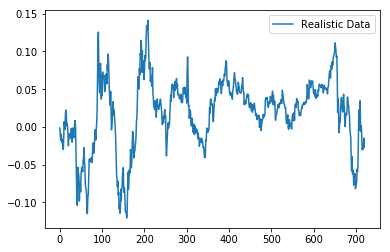

In [2]:
plt.plot(y_test, label='Realistic Data')
plt.legend()
plt.show()

# Create Model

In [4]:
# 1. Create network sequence
model = Sequential()
# 2. Create a LSTM layer - input.shape = [50, 1], output.shape = [50]
model.add(LSTM(input_shape = [50, 1], units=50, return_sequences=True))
# 3. Create a dropout layer(0.2) - it helps protect the model from memorizing or "overfitting" the training data 
model.add(Dropout(0.2))
# 4. Create a LSTM layer - output.shape = [100]
model.add(LSTM(100))
# 5. Create a dropout layer(0.2)
model.add(Dropout(0.2))
# 6. Create a fully connective layer - output.shape = [1]
model.add(Dense(units=1))
# 7. Score Function - f(x) = x + b
model.add(Activation("linear"))

# Training model

In [5]:
model.compile(loss="mse", optimizer="rmsprop")
model.fit(X_train, y_train, batch_size=512, epochs=1, validation_split=0.05)

Train on 6104 samples, validate on 322 samples
Epoch 1/1
6104/6104 [==============================] - 10s 2ms/step - loss: 0.0017 - val_loss: 2.2558e-04


# Predicition 

In [8]:
# A result list
prediction_seqs = []
# store prediction result
for i in range(X_test.shape[0]):
    prediction_seqs.append(model.predict(X_test[newaxis, i, :]))

(1, 50, 1)


# Plot result

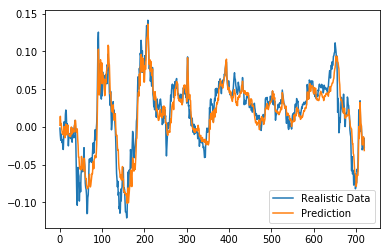

In [9]:
prediction_seqs = np.array(prediction_seqs).reshape(len(prediction_seqs))
plt.plot(y_test, label='Realistic Data')
plt.plot(prediction_seqs, label='Prediction')
plt.legend()
plt.show()